In [50]:
import numpy as np
import time
import matplotlib.pyplot as plt

In [28]:
def positional_encoding(omega, seq_len, d_model):
  pe = np.zeros((seq_len, d_model))
  position = np.arange(0, seq_len).reshape(-1, 1)
  div_term = np.exp(np.arange(0, d_model, 2) * -(np.log(omega) / d_model))
  pe[:, 0::2] = np.sin(position * div_term)
  pe[:, 1::2] = np.cos(position * div_term)

  return pe

In [29]:
def plot_positional_encoding(omega, seq_len, d_model):
  
  pe = positional_encoding(omega, seq_len, d_model)
  plt.clf()
  plt.figure(figsize=(16, 8))
  plt.imshow(pe, cmap='viridis')
  plt.xlabel('Depth')
  plt.ylabel('Position')
  plt.colorbar()
  plt.show()

In [230]:
def similarity_scores(pe):
  # print(f'pe : {pe}')
  # pe = np.array([[1, 0, 1, 0],[-0.9, 0, -0.9, 0],[0.8, 0, 0.8, 0]])
  sim_scores = []
  (rows, cols) = pe.shape
  for i in range(rows):
    for j in range(i+1, rows):
      diff = (pe[j] - pe[i])
      sim_score = (diff**2)# .max()
      sim_score2 = np.linalg.norm(diff)/cols
      # print(f'pe[{j}] : {pe[j]}')
      # print(f'pe[{i}] : {pe[i]}')
      # print(f'sim_score: {sim_score}')
      sim_scores.append(sim_score2)
      # print()
    
  return np.asarray(sim_scores)
    
      
  

In [235]:
def plot_similarity_hist(omega, seq_len, d_model):
    
    plt.figure(figsize=(16, 8))
    
    for _,i in enumerate(omega):
        pe = positional_encoding(i, seq_len, d_model)
        sim_score = similarity_scores(pe)
        plt.hist(sim_score, bins=100,
                  alpha=1,
                    label=f'omega = {i}',
                      density=True, 
                      cumulative=True,
                       histtype='step' )
        plt.yscale('log')
    plt.legend()
    plt.show()

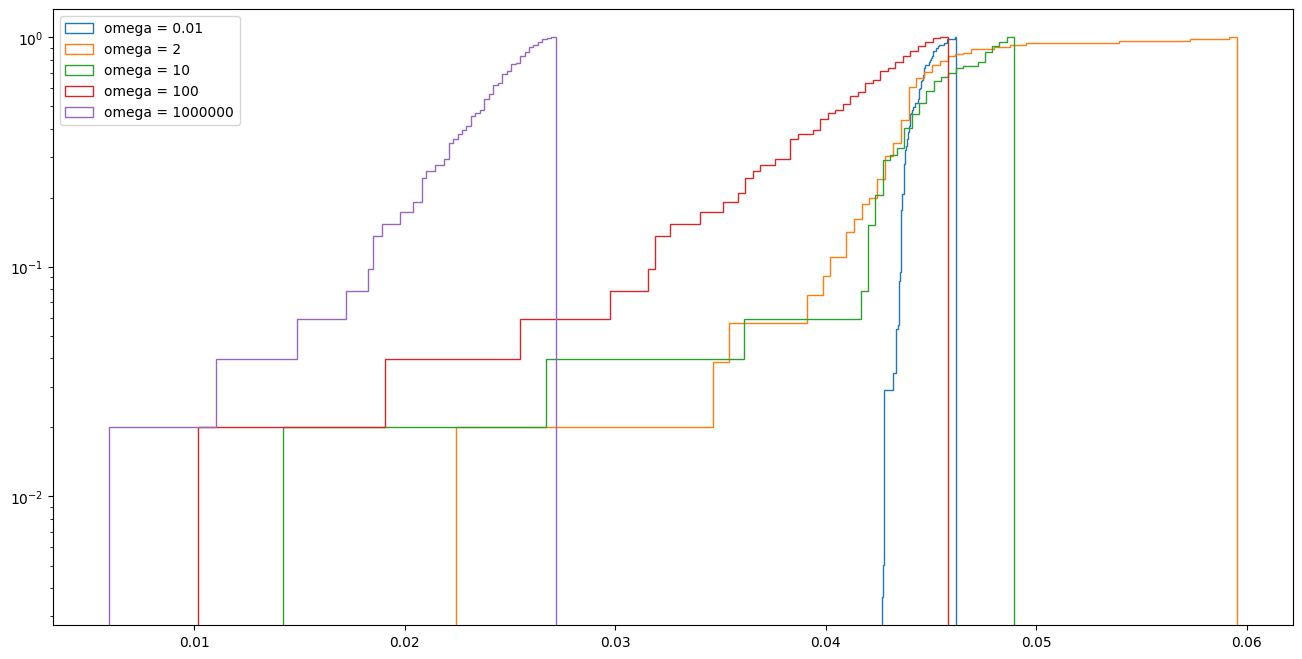

In [240]:
omega = [0.01, 2, 10, 100,   1000000]
plot_similarity_hist(omega=omega, seq_len=100, d_model=512)

<Figure size 640x480 with 0 Axes>

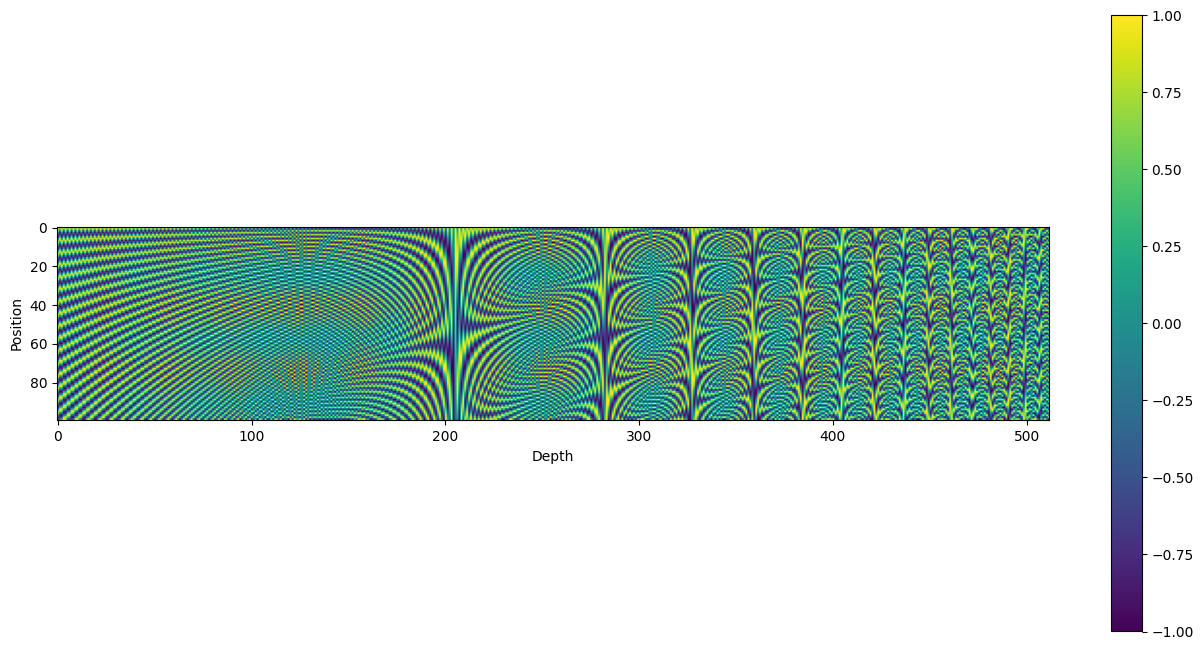

<Figure size 640x480 with 0 Axes>

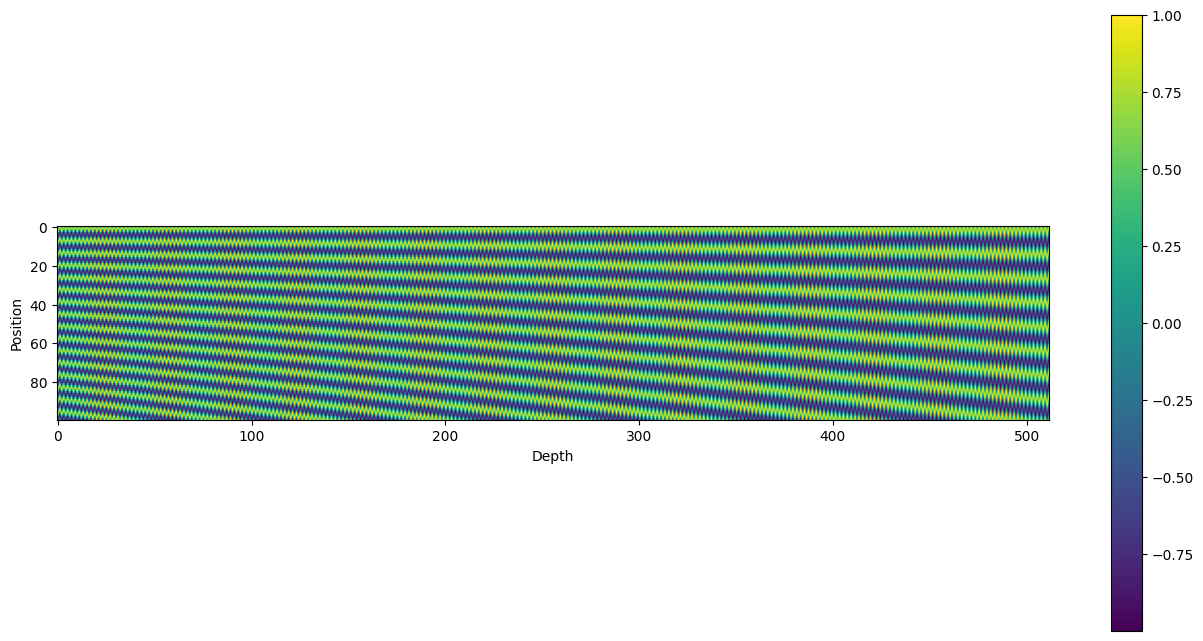

<Figure size 640x480 with 0 Axes>

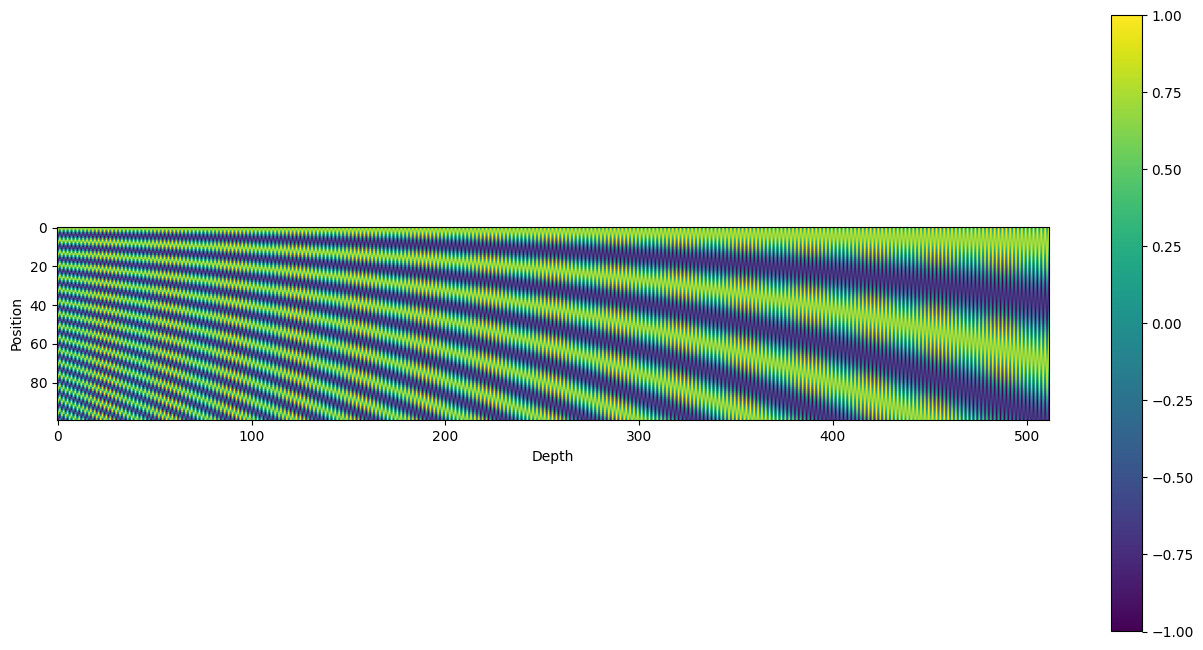

<Figure size 640x480 with 0 Axes>

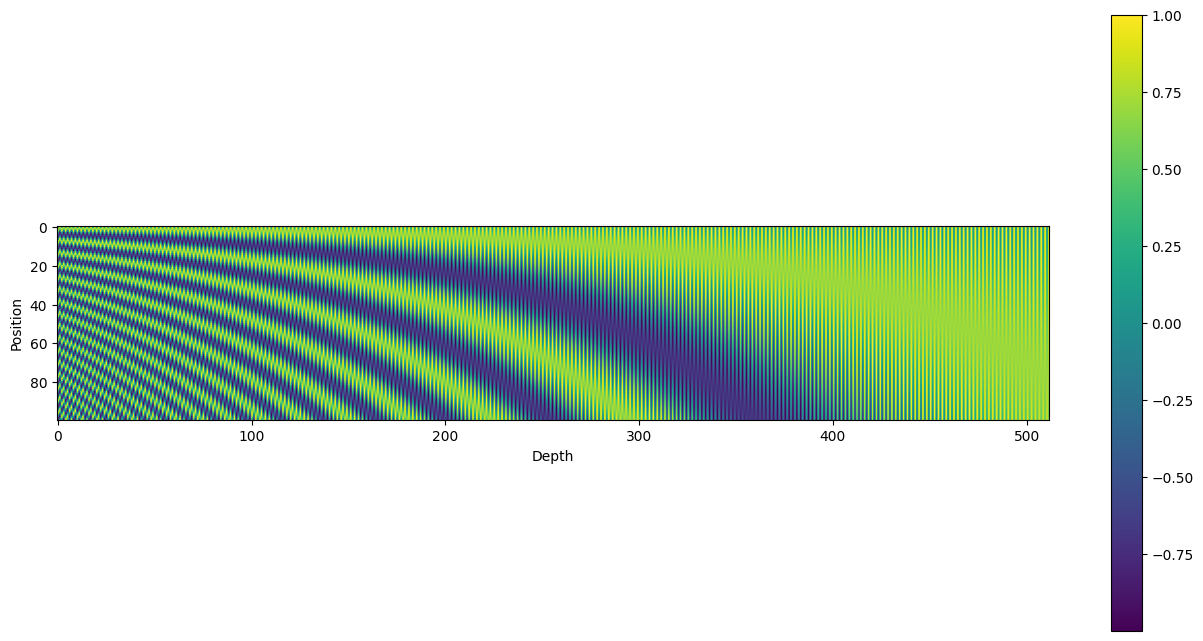

<Figure size 640x480 with 0 Axes>

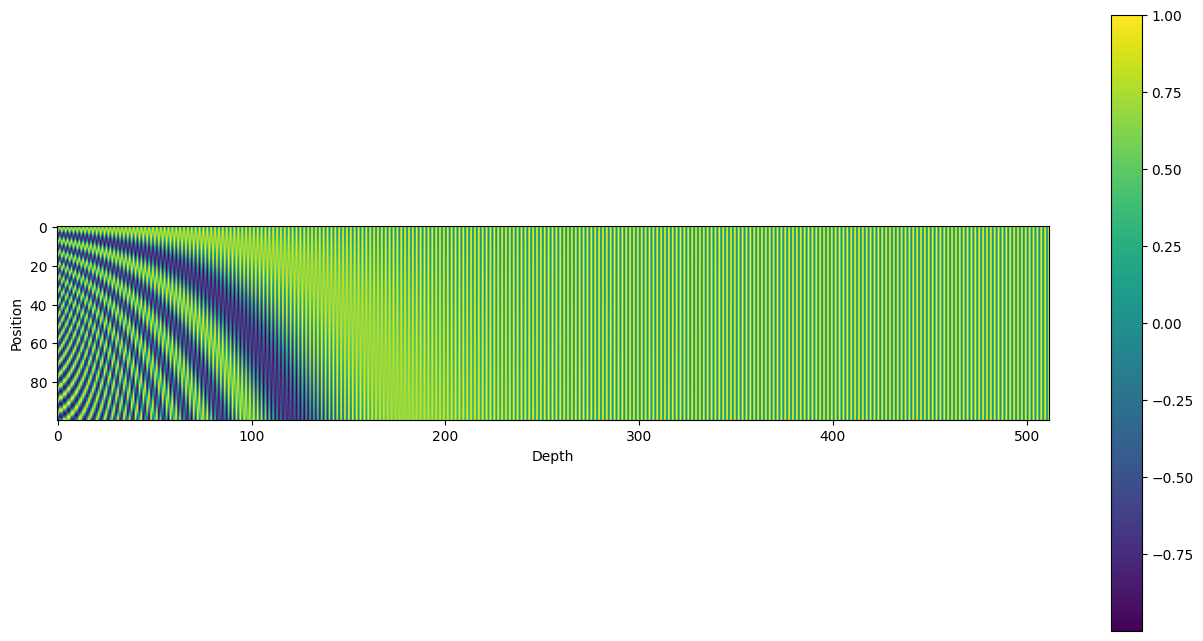

In [239]:

for _,i in enumerate(omega):
  plot_positional_encoding(i, seq_len=100, d_model=512)
  